In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [101]:
df = pd.read_csv('C:/Users/prathyusha/OneDrive/Documents/MLA2/housing.csv')

In [102]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# BASIC EDA

In [103]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [104]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [105]:
df.shape

(545, 13)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [107]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [108]:
df.value_counts('furnishingstatus')

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
dtype: int64

In [109]:
df.value_counts('prefarea')

prefarea
no     417
yes    128
dtype: int64

In [110]:
df.value_counts('hotwaterheating')

hotwaterheating
no     520
yes     25
dtype: int64

In [111]:
df.value_counts('basement')

basement
no     354
yes    191
dtype: int64

In [112]:
df.value_counts('guestroom')

guestroom
no     448
yes     97
dtype: int64

In [113]:
df.value_counts('mainroad')

mainroad
yes    468
no      77
dtype: int64

In [114]:
df.value_counts('airconditioning')

airconditioning
no     373
yes    172
dtype: int64

# DataPreprocessing

In [115]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no null values

In [116]:
#if there are missing values we need to use the code
#mean = df['bedrooms'].mean() #imputing item_weight with mean
#df['bedrooms'].fillna(mean, inplace =True)


Converting categorical data to numerical

In [117]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df['furnishingstatus'].unique()

array([0, 1, 2])

In [118]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['prefarea']= label_encoder.fit_transform(df['prefarea'])
df['prefarea'].unique()

array([1, 0])

In [119]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['hotwaterheating'].unique()

array([0, 1])

In [120]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['basement']= label_encoder.fit_transform(df['basement'])
df['basement'].unique()

array([0, 1])

In [121]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['guestroom'].unique()

array([0, 1])

In [122]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['mainroad'].unique()

array([1, 0])

In [123]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['airconditioning'].unique()

array([1, 0])

In [124]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


now we can see we converted all categorical data to numerical

# Visualizations

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'mainroad'}>,
        <AxesSubplot:title={'center':'guestroom'}>,
        <AxesSubplot:title={'center':'basement'}>],
       [<AxesSubplot:title={'center':'hotwaterheating'}>,
        <AxesSubplot:title={'center':'airconditioning'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'prefarea'}>],
       [<AxesSubplot:title={'center':'furnishingstatus'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

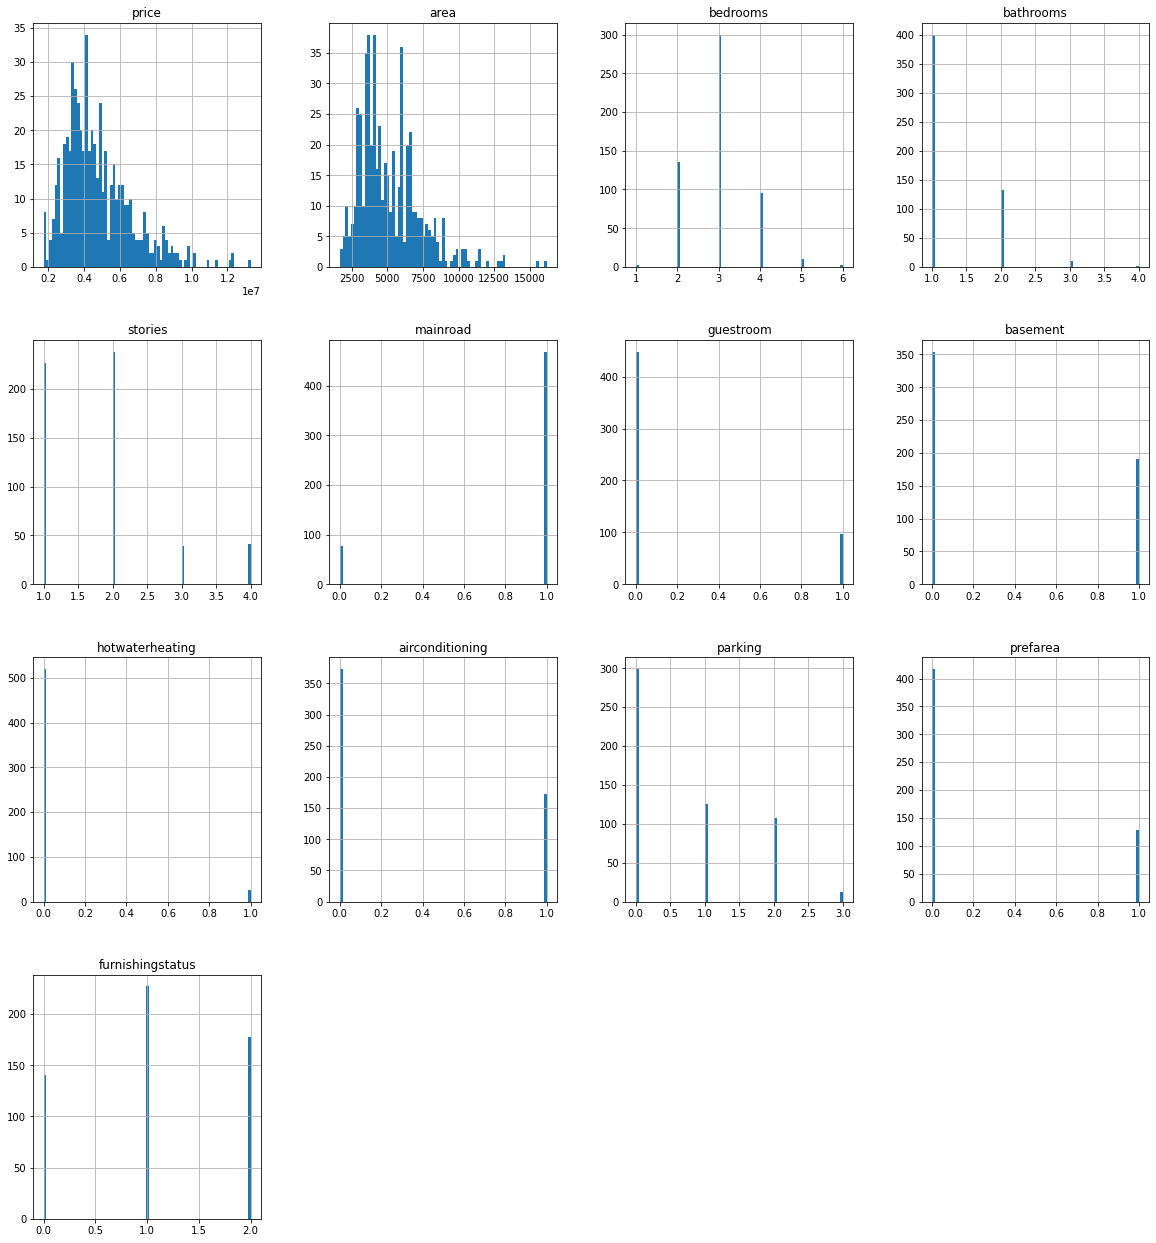

In [125]:
#Histograms for the data
df.hist(bins=75,figsize=(20,22))

In [126]:
df.corr() #we are defining the correlation between the attributes

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<AxesSubplot:>

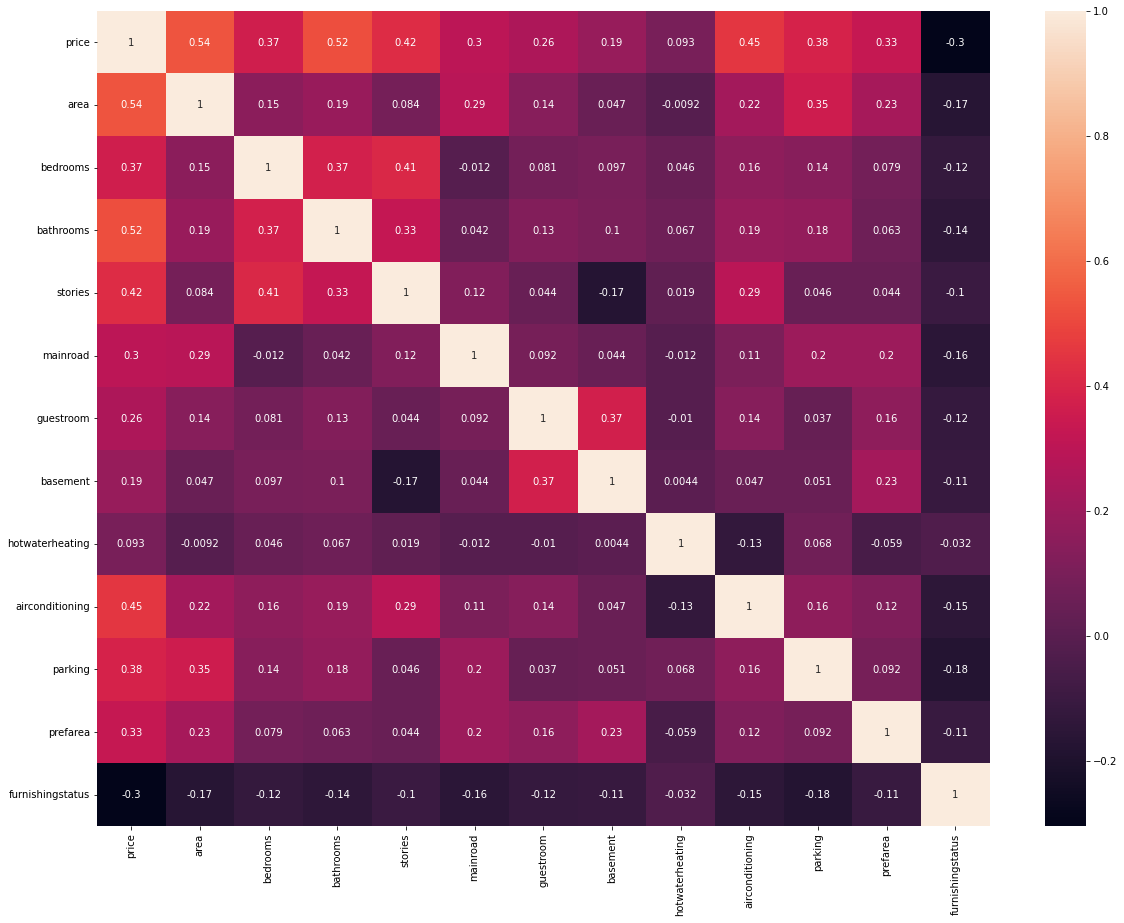

In [127]:
#Heat Map
#It helps to see correlation between attributes
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

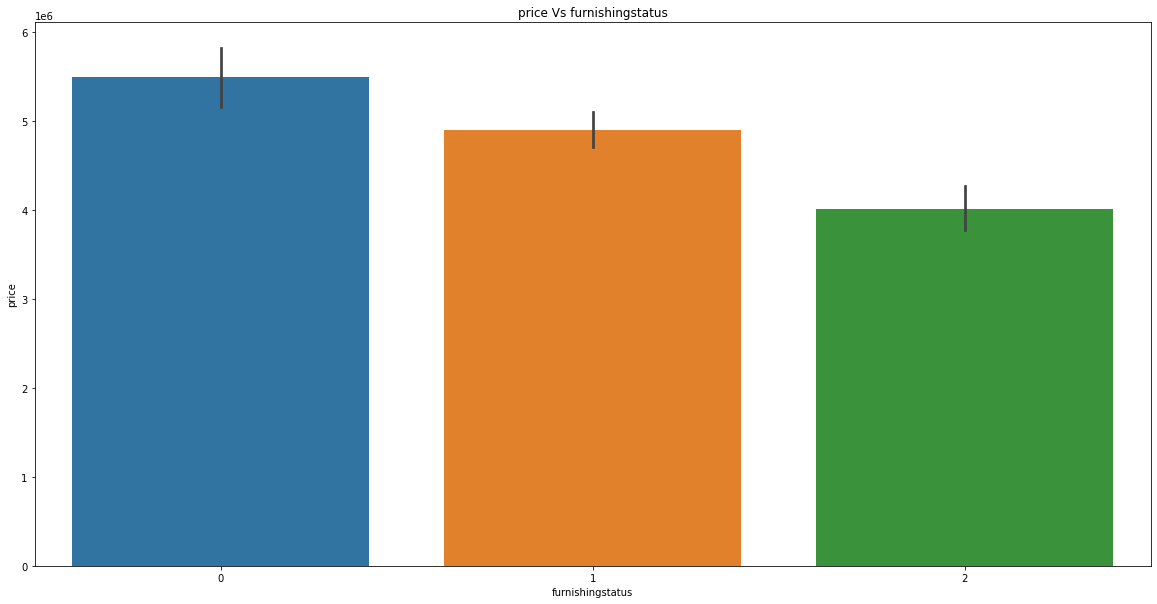

In [128]:
plt.figure(figsize=(20,10))
plt.title('price Vs furnishingstatus')
sns.barplot(x=df['furnishingstatus'],y=df['price'])
plt.show()

here we can conclude that price is more for semifurnished house

In [129]:
pd.cut(df['price'],bins=3)

0      (9450000.0, 13300000.0]
1      (9450000.0, 13300000.0]
2      (9450000.0, 13300000.0]
3      (9450000.0, 13300000.0]
4      (9450000.0, 13300000.0]
                ...           
540     (1738450.0, 5600000.0]
541     (1738450.0, 5600000.0]
542     (1738450.0, 5600000.0]
543     (1738450.0, 5600000.0]
544     (1738450.0, 5600000.0]
Name: price, Length: 545, dtype: category
Categories (3, interval[float64, right]): [(1738450.0, 5600000.0] < (5600000.0, 9450000.0] < (9450000.0, 13300000.0]]

In [130]:
pd.cut(df['price'], bins=3, labels = ["low", "medium", "high"]).value_counts()

low       403
medium    130
high       12
Name: price, dtype: int64

In [131]:
df['price'] = pd.cut(df.price, bins=3, labels = ["low", "medium", "high"], right = True)

In [132]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,high,7420,4,2,3,1,0,0,0,1,2,1,0
1,high,8960,4,4,4,1,0,0,0,1,3,0,0
2,high,9960,3,2,2,1,0,1,0,0,2,1,1
3,high,7500,4,2,2,1,0,1,0,1,3,1,0
4,high,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,low,3000,2,1,1,1,0,1,0,0,2,0,2
541,low,2400,3,1,1,0,0,0,0,0,0,0,1
542,low,3620,2,1,1,1,0,0,0,0,0,0,2
543,low,2910,3,1,1,0,0,0,0,0,0,0,0


In [133]:
df.loc[df['price']=='high']

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,high,7420,4,2,3,1,0,0,0,1,2,1,0
1,high,8960,4,4,4,1,0,0,0,1,3,0,0
2,high,9960,3,2,2,1,0,1,0,0,2,1,1
3,high,7500,4,2,2,1,0,1,0,1,3,1,0
4,high,7420,4,1,2,1,1,1,0,1,2,0,0
5,high,7500,3,3,1,1,0,1,0,1,2,1,1
6,high,8580,4,3,4,1,0,0,0,1,2,1,1
7,high,16200,5,3,2,1,0,0,0,0,0,0,2
8,high,8100,4,1,2,1,1,1,0,1,2,1,0
9,high,5750,3,2,4,1,1,0,0,1,1,1,2


In [134]:
df.loc[df['price']=='medium']

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
12,medium,6550,4,2,2,1,0,0,0,1,1,1,1
13,medium,3500,4,2,2,1,0,0,1,0,2,0,0
14,medium,7800,3,2,2,1,0,0,0,0,0,1,1
15,medium,6000,4,1,2,1,0,1,0,0,2,0,1
16,medium,6600,4,2,2,1,1,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,medium,4640,4,1,2,1,0,0,0,0,1,0,1
138,medium,5000,3,1,3,1,0,0,0,1,0,0,1
139,medium,6360,3,1,1,1,1,1,0,1,2,1,0
140,medium,5800,3,2,4,1,0,0,0,1,0,0,2


In [135]:
df.loc[df['price']=='low']

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
142,low,10500,4,2,2,1,0,0,0,0,1,0,1
143,low,4800,5,2,3,0,0,1,1,0,0,0,2
144,low,4700,4,1,2,1,1,1,0,1,1,0,0
145,low,5000,3,1,4,1,0,0,0,0,0,0,0
146,low,10500,2,1,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,low,3000,2,1,1,1,0,1,0,0,2,0,2
541,low,2400,3,1,1,0,0,0,0,0,0,0,1
542,low,3620,2,1,1,1,0,0,0,0,0,0,2
543,low,2910,3,1,1,0,0,0,0,0,0,0,0


In [136]:
y = df.price
y.value_counts()/y.count()

low       0.739450
medium    0.238532
high      0.022018
Name: price, dtype: float64

In [137]:
price_count = df.price.value_counts()

In [138]:
Y = df.price
X = df.drop(['price'], axis=1)

In [140]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Removed indexes:')

print(X_ros.shape, y_ros.shape)

Removed indexes:
(1209, 12) (1209,)


In [141]:
y_ros.value_counts()

low       403
medium    403
high      403
Name: price, dtype: int64

In [142]:
print(X_ros.shape)
print(y_ros.shape)

(1209, 12)
(1209,)


In [143]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.3)

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 

In [146]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
 

In [147]:
knn.score(x_test,y_test)

0.953168044077135

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred))

[[131   0   0]
 [  0 105  12]
 [  2   3 110]]
              precision    recall  f1-score   support

        high       0.98      1.00      0.99       131
         low       0.97      0.90      0.93       117
      medium       0.90      0.96      0.93       115

    accuracy                           0.95       363
   macro avg       0.95      0.95      0.95       363
weighted avg       0.95      0.95      0.95       363



Text(0, 0.5, 'Error Rate')

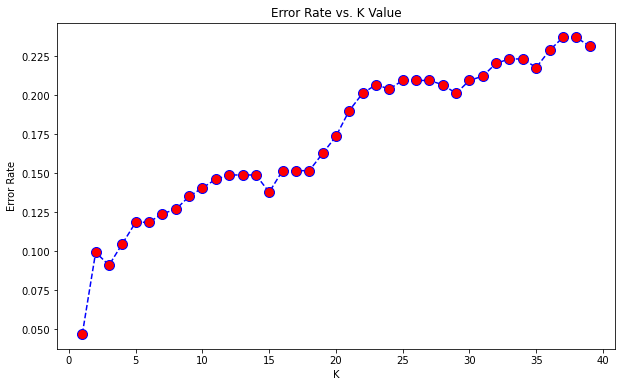

In [151]:
error_rate = []

# Will take some time
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


After k=1 the error rate is increasing but let's check with k=15 to see what result we are achieving

In [158]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


# NOW WITH K = 15
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 15')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


WITH K = 1


[[131   0   0]
 [  0 105  12]
 [  2   3 110]]


              precision    recall  f1-score   support

        high       0.98      1.00      0.99       131
         low       0.97      0.90      0.93       117
      medium       0.90      0.96      0.93       115

    accuracy                           0.95       363
   macro avg       0.95      0.95      0.95       363
weighted avg       0.95      0.95      0.95       363

WITH K = 15


[[131   0   0]
 [  4 100  13]
 [ 20  13  82]]


              precision    recall  f1-score   support

        high       0.85      1.00      0.92       131
         low       0.88      0.85      0.87       117
      medium       0.86      0.71      0.78       115

    accuracy                           0.86       363
   macro avg       0.86      0.86      0.86       363
weighted avg       0.86      0.86      0.86       363



Here we can conclude that k=1 is best for our model